In [21]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
from urllib.parse import urlencode

from io import BytesIO


## Задание 1

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/step_1_lesson_7.csv')
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [4]:
df_robot = df.query("user_type == 'Robots'")
df_robot

,date,user_type,visits
1,2020-06-15,Robots,177.0
3,2020-06-16,Robots,91.0
5,2020-06-17,Robots,138.0


In [5]:
df_people = df.query("user_type == 'People'")
df_people

,date,user_type,visits
0,2020-06-15,People,417.0
2,2020-06-16,People,472.0
4,2020-06-17,People,475.0


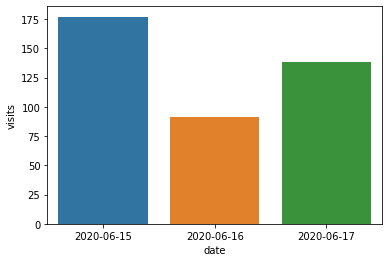

In [8]:
sns.barplot(x='date', y='visits', data = df_robot)

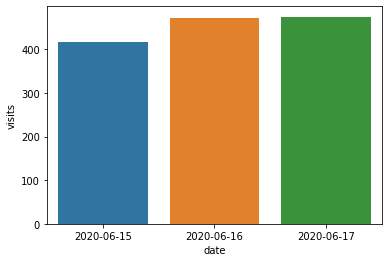

In [9]:
sns.barplot(x='date', y='visits', data = df_people)

## Задание 2

In [10]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/step_2_lesson_7.csv')
df

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [31]:
# chrome_users = (pd.Series(np.where((df.browser.str.contains('Google Chrome')), 1, 0)).sum() * df.browser.count()) / 100
# chrome_users.round(0)
chrome_count = df.query("browser == 'Google Chrome'").visits[0]
all_count = df.visits.sum()
proc_links = ((df.query("browser == 'Google Chrome'").visits[0] * 100) / df.visits.sum()).round(0)
proc_links

60.0

In [16]:
df.browser.count()

15

## Задание 3

In [32]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/step_3_lesson_7.csv')
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [52]:
bots_count = df.query("user_type == 'Robots'")\
    .groupby(['browser', 'user_type'], as_index = False)\
    .agg({'visits':'sum'})\
    .sort_values('visits', ascending = False)
bots_count

,browser,user_type,visits
3,Google Chrome,Robots,104.0
2,Firefox,Robots,31.0
6,Safari,Robots,22.0
9,Yandex Browser,Robots,7.0
5,Opera,Robots,5.0
8,UCWEB,Robots,4.0
0,Chromium,Robots,1.0
1,Edge,Robots,1.0
4,Mobile Safari,Robots,1.0
7,Samsung Internet,Robots,1.0


In [57]:
all_counts = df.groupby('browser', as_index = False)\
    .agg({'visits':'sum'})\
    .sort_values('visits', ascending = False)\
    .rename(columns = {'visits': 'all_visits'})
all_counts

,browser,all_visits
6,Google Chrome,354.0
5,Firefox,58.0
13,Yandex Browser,54.0
9,Safari,41.0
1,Chrome Mobile,31.0
7,Mobile Safari,16.0
8,Opera,16.0
10,Samsung Internet,9.0
4,Edge,5.0
11,UCWEB,4.0


In [59]:
all_counts = all_counts.merge(bots_count, how='left')

In [62]:
all_counts['ctr'] = all_counts.visits / all_counts.all_visits
all_counts.sort_values('ctr', ascending = False)

,browser,all_visits,user_type,visits,ctr
9,UCWEB,4.0,Robots,4.0,1.000000
3,Safari,41.0,Robots,22.0,0.536585
1,Firefox,58.0,Robots,31.0,0.534483
10,Chromium,2.0,Robots,1.0,0.500000
6,Opera,16.0,Robots,5.0,0.312500
0,Google Chrome,354.0,Robots,104.0,0.293785
8,Edge,5.0,Robots,1.0,0.200000
2,Yandex Browser,54.0,Robots,7.0,0.129630
7,Samsung Internet,9.0,Robots,1.0,0.111111
5,Mobile Safari,16.0,Robots,1.0,0.062500


## Задание 4

In [41]:
df_4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/step_4_lesson_7.csv')
df_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [23]:
safari_people_visits = df.query("browser == 'Safari' & user_type == 'People'").visits
safari_people_visits

7    19.0
Name: visits, dtype: float64

In [24]:
result = (safari_people_visits * 100) / df.visits.sum()
result.round(1)

7    3.2
Name: visits, dtype: float64

## Задание 6

In [25]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [36]:

import gspread
from oauth2client.service_account import ServiceAccountCredentials


my_mail = 'kachanovsky2002@gmail.com'
path_to_credentials = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/testik-352819-bfbcdd3d17c8.json'

scope = ['https://spreadsheets.google.com/feeds',
          'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)

gs = gspread.authorize(credentials)

table_name = 'dataframe'
sheet = gs.create(table_name)

spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id

sheet.share('kachanovsky2002@gmail.com' ,perm_type='user', role='writer')

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson7/step_3_lesson_7.csv')
df.reset_index()

sheet = 'Master'
d2g.upload(df,table_name,sheet,credentials = credentials, row_names = True)

# Отправлем ссылку на гугл таблицу

token_vk = ''
vk_session = vk_api.VkApi(token = token_vk)
vk = vk_session.get_api()
vk.messages.send(
    chat_id = 4,
    random_id = 3,
    message=spreadsheet_url)# Название беседы: ТЕСТ(ключ - 4)

0

## Задание 7

In [37]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_analitic = pd.read_csv(BytesIO(data))

In [42]:
jaint_analitics_df = df_analitic.merge(df_4, how = 'left')

In [44]:
jaint_analitics_df['attitude_users'] = jaint_analitics_df.visits / jaint_analitics_df.users 

In [47]:
jaint_analitics_df.query("browser == 'Google Chrome' & user_type == 'Robots'")

,date,browser,user_type,users,visits,attitude_users
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
